In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inventory-optimization-for-retail/inventory_monitoring.csv
/kaggle/input/inventory-optimization-for-retail/demand_forecasting.csv
/kaggle/input/inventory-optimization-for-retail/pricing_optimization.csv


In [90]:
df1 = pd.read_csv('/kaggle/input/inventory-optimization-for-retail/demand_forecasting.csv').fillna(0)
df1

,Product ID,Date,Store ID,Sales Quantity,Price,Promotions,Seasonality Factors,External Factors,Demand Trend,Customer Segments
0,4277,2024-01-03,48,330,24.38,No,Festival,Competitor Pricing,Increasing,Regular
1,5540,2024-04-29,10,334,74.98,Yes,Holiday,Weather,Stable,Premium
2,5406,2024-01-11,67,429,24.83,Yes,Holiday,Economic Indicator,Decreasing,Premium
3,5617,2024-04-04,17,298,13.41,No,0,Economic Indicator,Stable,Regular
4,3480,2024-12-14,33,344,94.96,Yes,Festival,Weather,Increasing,Regular
...,...,...,...,...,...,...,...,...,...,...
9995,6545,2024-11-26,54,47,47.12,No,0,Competitor Pricing,Decreasing,Budget
9996,4341,2024-04-08,82,59,65.11,No,Festival,0,Increasing,Budget
9997,8679,2024-02-16,55,481,59.97,No,Holiday,Economic Indicator,Stable,Premium
9998,6281,2024-02-15,97,142,48.70,No,Festival,0,Decreasing,Regular


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           10000 non-null  int64  
 1   Date                 10000 non-null  object 
 2   Store ID             10000 non-null  int64  
 3   Sales Quantity       10000 non-null  int64  
 4   Price                10000 non-null  float64
 5   Promotions           10000 non-null  object 
 6   Seasonality Factors  10000 non-null  object 
 7   External Factors     10000 non-null  object 
 8   Demand Trend         10000 non-null  object 
 9   Customer Segments    10000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB


In [265]:
df1.columns

Index(['Promotions', 'Seasonality Factors', 'External Factors', 'Demand Trend',
       'Customer Segments'],
      dtype='object')

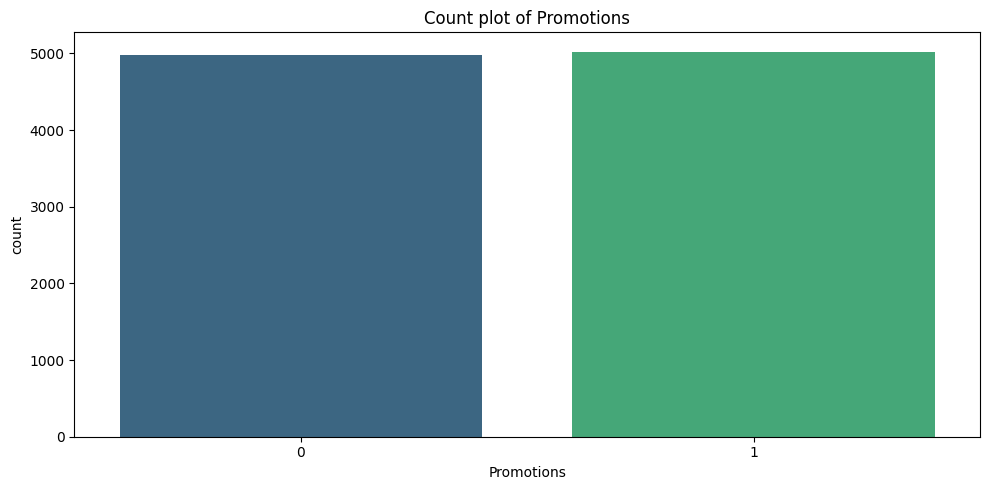

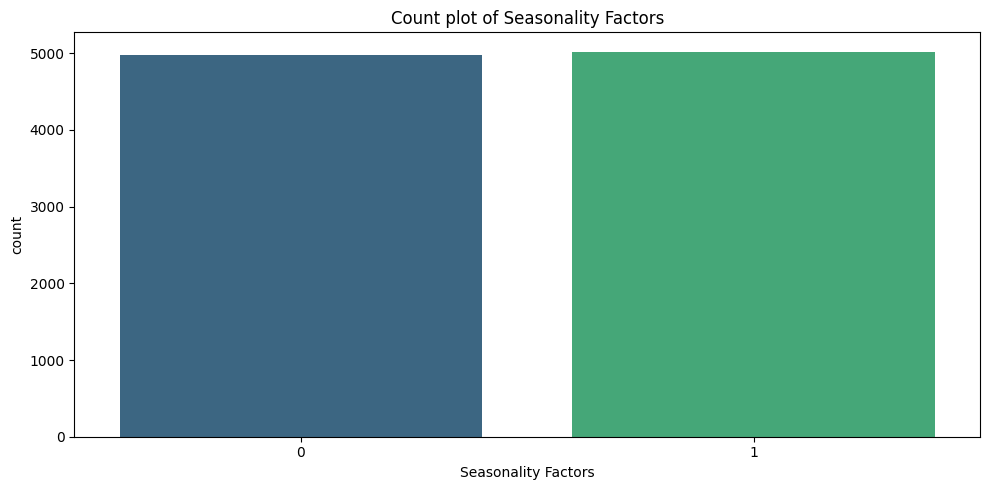

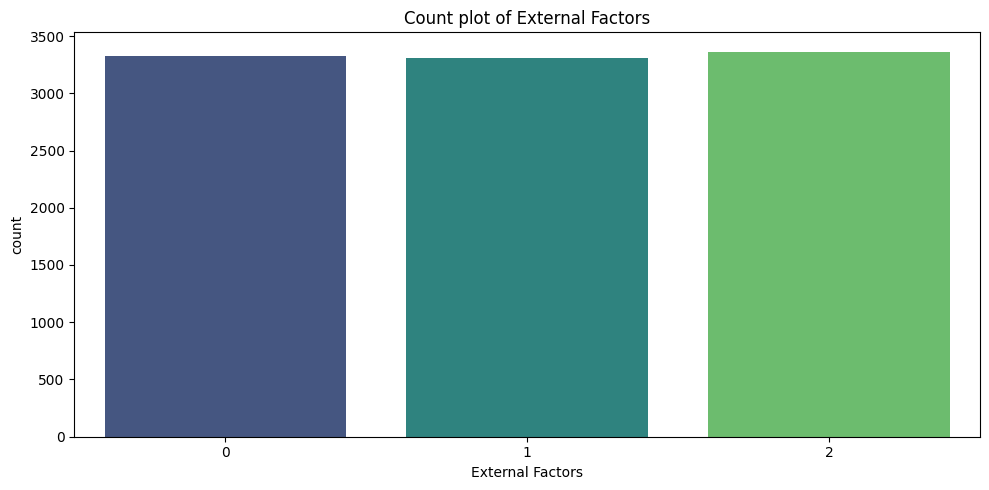

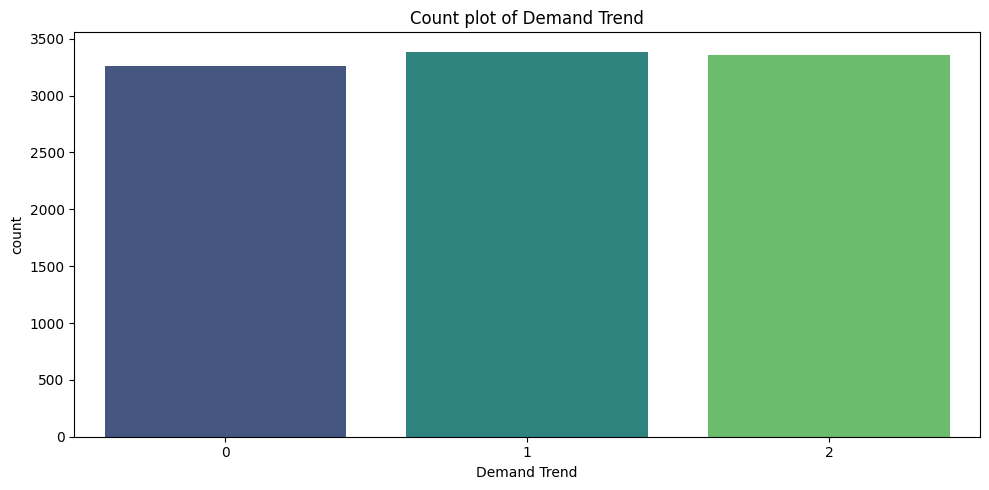

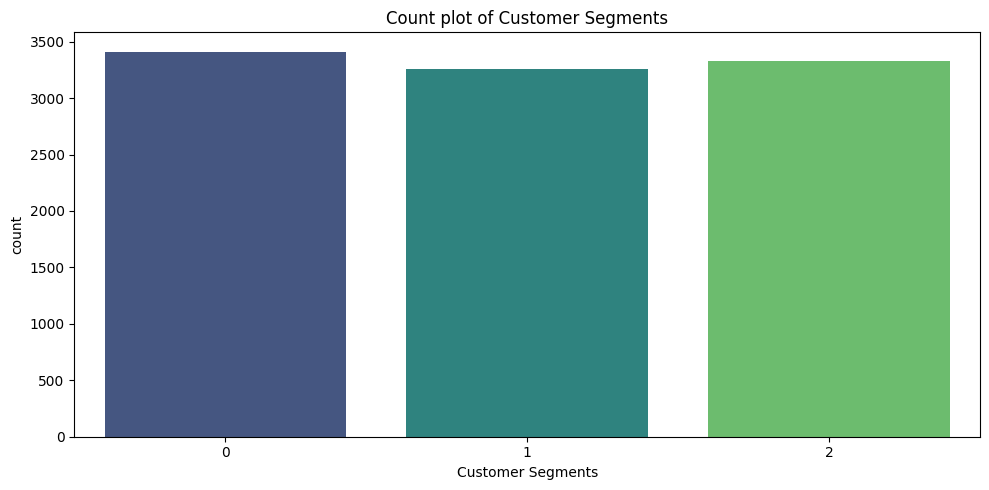

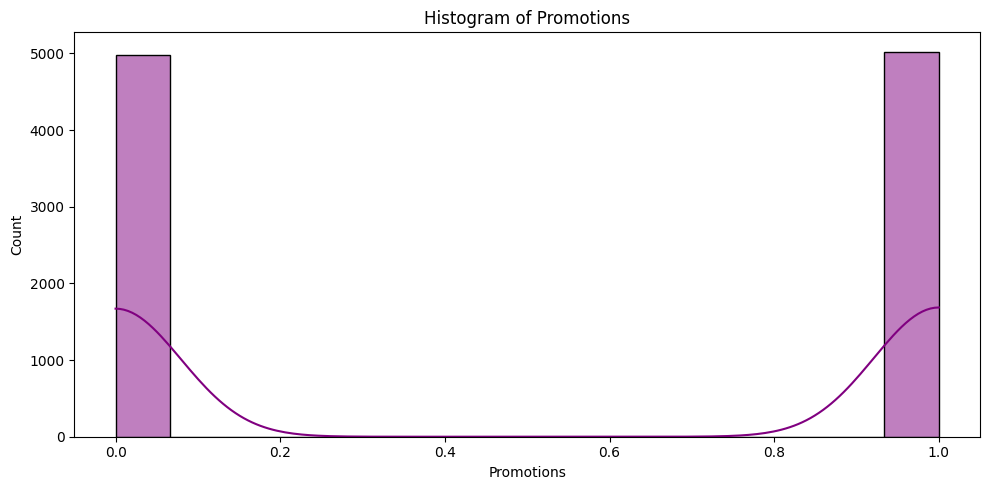

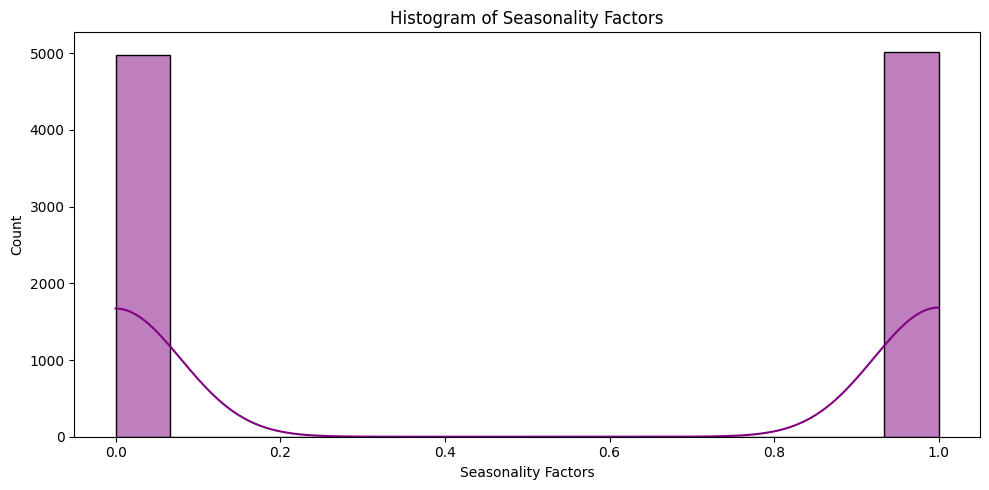

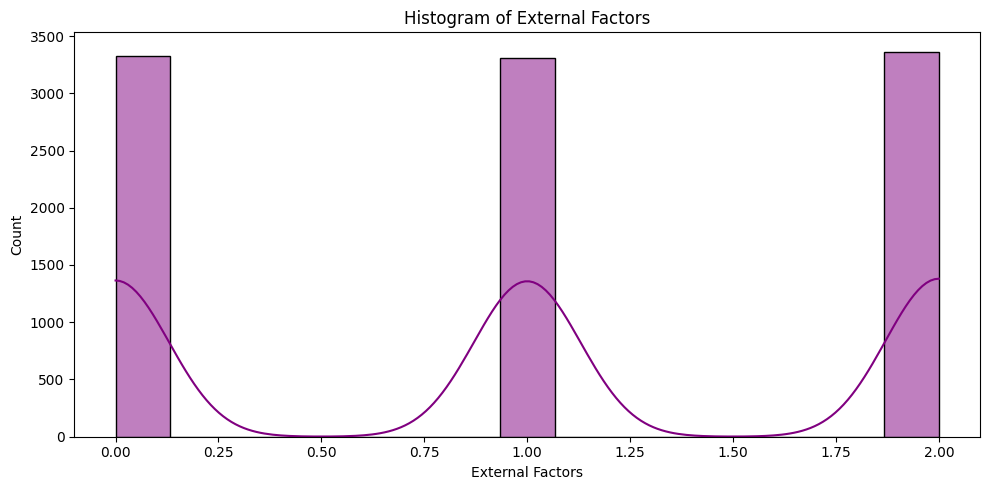

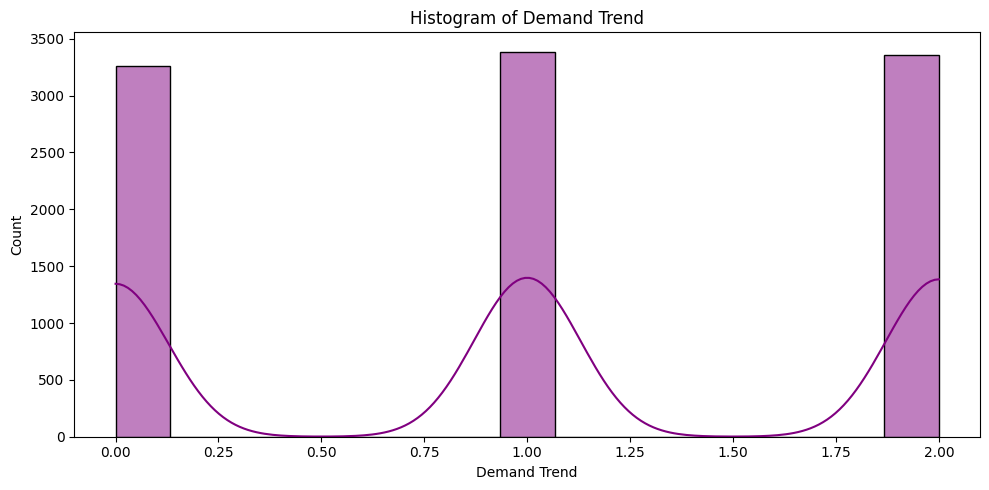

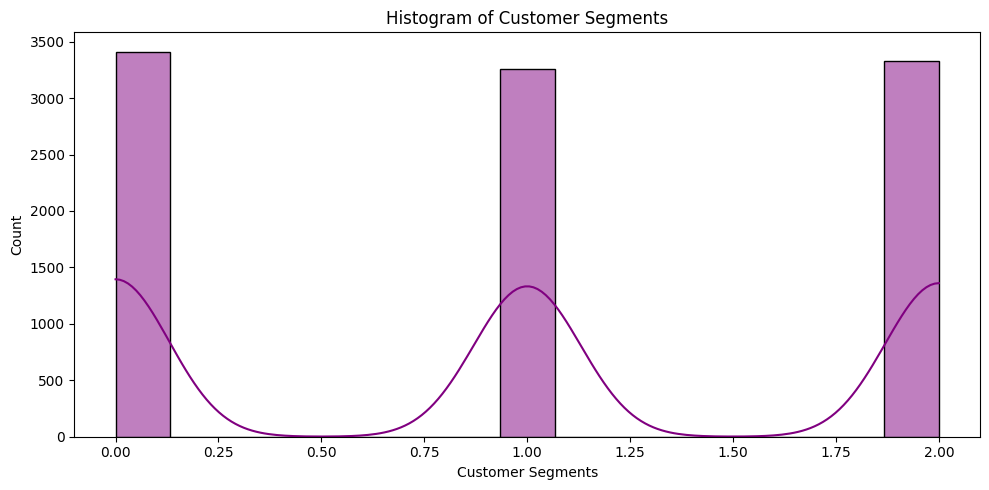

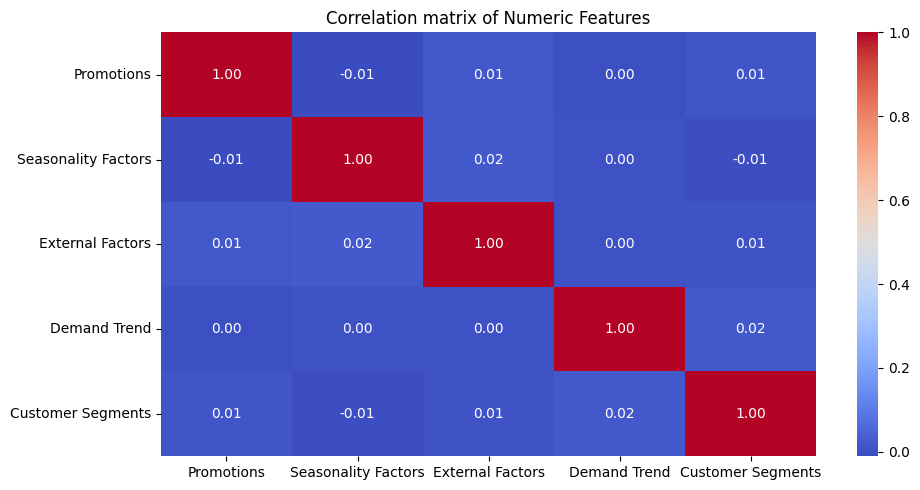

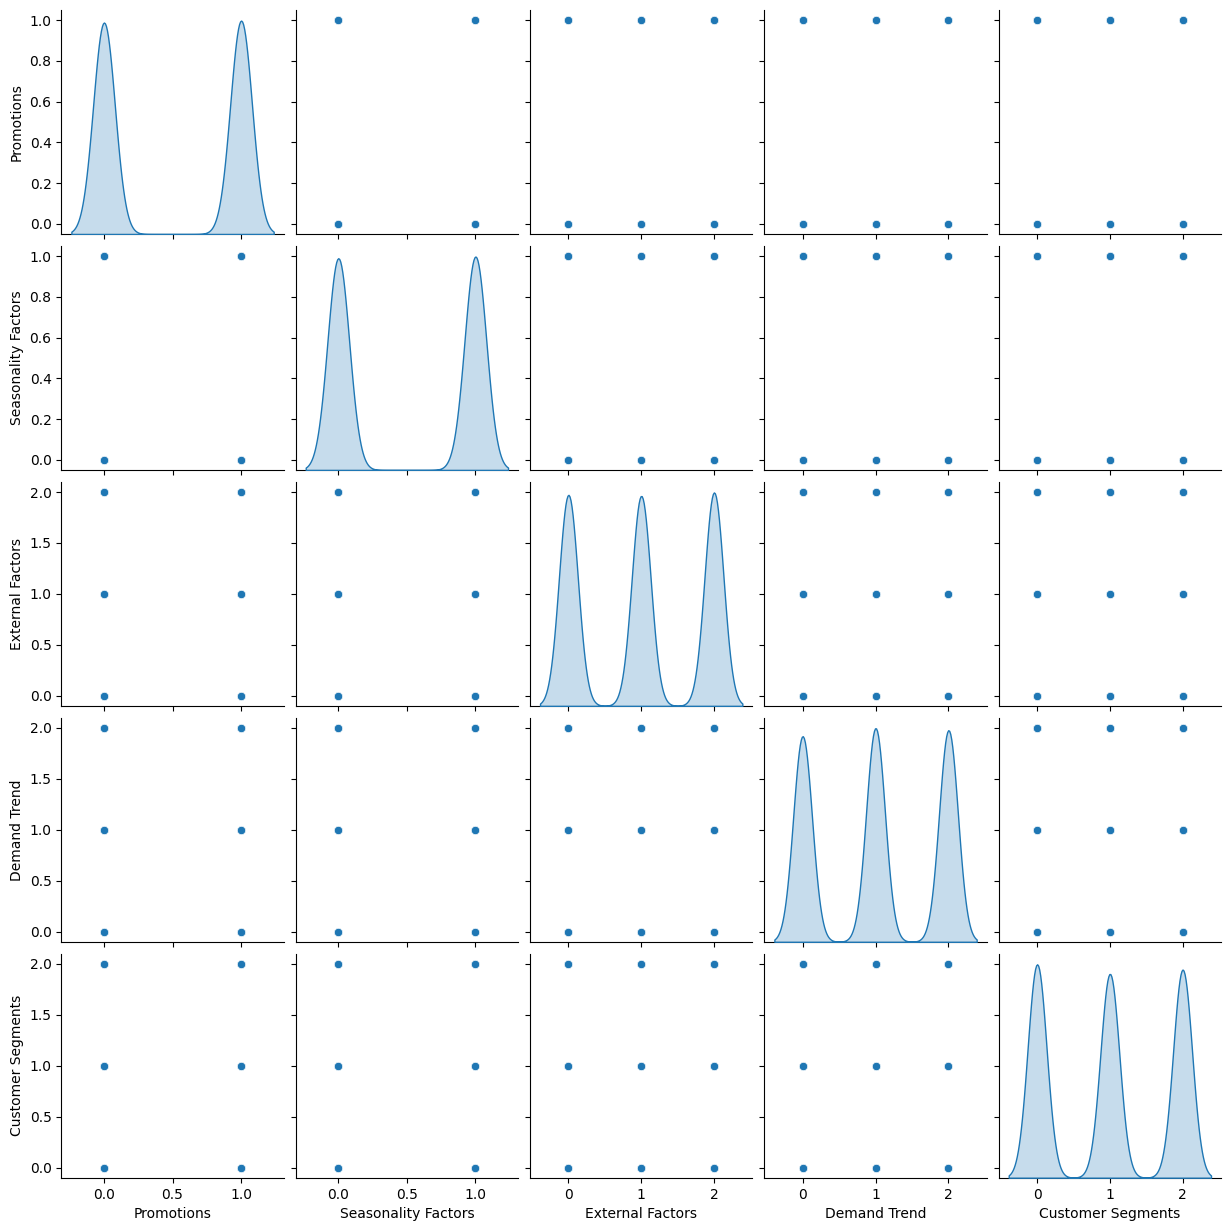

In [267]:
# COUNT PLOT FOR CATEGORICAL COLUMNS
cate_cols =['Promotions', 'Seasonality Factors', 'External Factors', 'Demand Trend',
       'Customer Segments']
for features in cate_cols:
    if features in df1.columns:
        plt.figure(figsize=(10,5))
        sns.countplot(x=features,data=df1,palette='viridis')
        plt.title(f'Count plot of {features}')
        plt.tight_layout()
        plt.show()

#PLOT HISTOGRAM FOR SEVERAL KEY NUM_FEATURE.
num_feature = ['Promotions', 'Seasonality Factors', 'External Factors', 'Demand Trend',
       'Customer Segments']

for feature in num_feature:
    if feature in df1.columns:
        plt.figure(figsize=(10,5))
        sns.histplot(df1[feature].dropna(),kde=True,color='purple')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

nume_df = df1.select_dtypes(include=[np.number])
if nume_df.shape[1]>=4:
    plt.figure(figsize=(10,5))
    correlation_matrix = nume_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title('Correlation matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

# PAIR-PLOT AMONG A SUBSET OF VARIABLES
selected_columns = ['Promotions', 'Seasonality Factors', 'External Factors', 'Demand Trend',
       'Customer Segments']
if set(selected_columns).issubset(df1.columns):
    sns.pairplot(df1[selected_columns].dropna(),diag_kind='kde')
    plt.show()

# DATA PREPROCESSING 
* Here just dividing the 0 equally in both the values same with the external feaurue column alos.

In [92]:
# Count occurrences of each category
total_val = df1['Seasonality Factors'].value_counts()

# Get counts for Holiday, Festival, and Zero
Holiday_count = total_val.get('Holiday', 0)
Festival_count = total_val.get('Festival', 0)
zero_count = total_val.get(0, 0)

# If there are no 'Zero' values, no need to proceed further
if zero_count > 0:

    # Distribute Zero equally
    zero_to_Holiday = zero_count // 2
    zero_to_Festival = zero_count - zero_to_Holiday

    # Get indices of rows where 'Seasonality Factors' is 'Zero'
    zero_indices = df1[df1['Seasonality Factors'] == 0].index

    # Update first half to 'Holiday' and second half to 'Festival'
    df1.loc[zero_indices[:zero_to_Festival], 'Seasonality Factors'] = 'Holiday'
    df1.loc[zero_indices[zero_to_Holiday:], 'Seasonality Factors'] = 'Festival'

# Print updated value counts
print(df1['Seasonality Factors'].value_counts())

Seasonality Factors
Holiday     5020
Festival    4980
Name: count, dtype: int64


In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           10000 non-null  int64  
 1   Date                 10000 non-null  object 
 2   Store ID             10000 non-null  int64  
 3   Sales Quantity       10000 non-null  int64  
 4   Price                10000 non-null  float64
 5   Promotions           10000 non-null  object 
 6   Seasonality Factors  10000 non-null  object 
 7   External Factors     10000 non-null  object 
 8   Demand Trend         10000 non-null  object 
 9   Customer Segments    10000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB


In [94]:
df1['External Factors'].value_counts()

External Factors
Weather               2556
Competitor Pricing    2518
Economic Indicator    2500
0                     2426
Name: count, dtype: int64

In [95]:
# Count occurrences of each category
total_val = df1['External Factors'].value_counts()

# Get counts for Holiday, Festival, and Zero
Weather_count = total_val.get('Weather', 0)
Competitor_pricing_count = total_val.get('Competitor Pricing', 0)
Economic_indicator_count = total_val.get('Economic Indicator',0)
zero_count = total_val.get(0, 0)

# If there are no 'Zero' values, no need to proceed further
if zero_count > 0:

    # Distribute Zero equally
    
    zero_to_weather = zero_count // 3
    zero_to_competitor  = zero_count // 3
    zero_to_economic = zero_count - (zero_to_weather + zero_to_competitor)

    # Get indices of rows where 'Seasonality Factors' is 'Zero'
    zero_indices = df1[df1['External Factors'] == 0].index

    # Update first half to 'Holiday' and second half to 'Festival'
    df1.loc[zero_indices[:zero_to_weather], 'External Factors'] = 'Weather'
    
    df1.loc[zero_indices[zero_to_weather : zero_to_weather + zero_to_competitor],'External Factors'] = 'Competitor Pricing'
    
    df1.loc[zero_indices[zero_to_weather + zero_to_competitor:], 'External Factors'] = 'Economic Indicator'

# Print updated value counts
print(df1['External Factors'].value_counts())

External Factors
Weather               3364
Competitor Pricing    3326
Economic Indicator    3310
Name: count, dtype: int64


In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           10000 non-null  int64  
 1   Date                 10000 non-null  object 
 2   Store ID             10000 non-null  int64  
 3   Sales Quantity       10000 non-null  int64  
 4   Price                10000 non-null  float64
 5   Promotions           10000 non-null  object 
 6   Seasonality Factors  10000 non-null  object 
 7   External Factors     10000 non-null  object 
 8   Demand Trend         10000 non-null  object 
 9   Customer Segments    10000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB


In [97]:
df1['Seasonality Factors']

0       Festival
1        Holiday
2        Holiday
3        Holiday
4       Festival
          ...   
9995    Festival
9996    Festival
9997     Holiday
9998    Festival
9999    Festival
Name: Seasonality Factors, Length: 10000, dtype: object

In [133]:
df1 = df1.drop(columns=['Product ID', 'Date', 'Store ID', 'Sales Quantity', 'Price'])

In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Promotions           10000 non-null  object
 1   Seasonality Factors  10000 non-null  object
 2   External Factors     10000 non-null  object
 3   Demand Trend         10000 non-null  object
 4   Customer Segments    10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB


In [145]:
df1.columns

Index(['Promotions', 'Seasonality Factors', 'External Factors', 'Demand Trend',
       'Customer Segments'],
      dtype='object')

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
le = LabelEncoder()

In [147]:
le_cols = ['Promotions', 'Seasonality Factors', 'External Factors', 'Demand Trend',
       'Customer Segments']
for column in le_cols:
    df1[column] = le.fit_transform(df1[column])

In [134]:
df1.columns

Index(['Promotions', 'Seasonality Factors', 'External Factors', 'Demand Trend',
       'Customer Segments'],
      dtype='object')

# MODEL SECTION

In [148]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [222]:
X = df1.drop(columns=['Seasonality Factors'])
y = df1['Seasonality Factors']

In [223]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [224]:
dtr = DecisionTreeRegressor()

In [225]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [226]:
y_pred_dtr = dtr.predict(X_test)

In [227]:
mse = mean_squared_error(y_test,y_pred_dtr)
r2score = r2_score(y_test,y_pred_dtr)
mae = mean_absolute_error(y_test,y_pred_dtr)
print(f'MSE:',mse)
print(f'R2-Score:',r2score)
print(f'MAE:',mae)

MSE: 0.25106076989787873
R2-Score: -0.00446908513567057
MAE: 0.49789115824855684


In [228]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30,40,50,60, None],
    'min_samples_split': [2, 5, 10,15,20,25,30],
    'min_samples_leaf': [1, 2, 4,6,8,10,15,20]
}
dtree_reg = DecisionTreeClassifier(random_state=42) # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_scr = r2_score(y_test,y_pred)
rmse = mse ** 0.5
rmae = mae ** 0.5
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test RMSE: {rmse}")
print(f"Test RMAE:' {rmae}")
print(f"Test R2 Score:{r2_scr}")

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test RMSE: 0.6928203230275509
Test RMAE:' 0.6928203230275509
Test R2 Score:-0.9204320972218751


In [229]:
from sklearn.svm import SVC

In [230]:
sv = SVC()

In [231]:
sv.fit(X_train,y_train)

SVC()

In [240]:
y_pred_sv = sv.predict(X_test)

In [241]:
acc_sv = accuracy_score(y_pred_sv,y_test)
print(f'acc_sv:',acc_sv*100)

acc_sv: 52.300000000000004


In [242]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [243]:
rfr = RandomForestRegressor()

In [244]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [245]:
y_pred_rfr = rfr.predict(X_test)

In [246]:
mse = mean_squared_error(y_test,y_pred_rfr)
r2score = r2_score(y_test,y_pred_rfr)
mae = mean_absolute_error(y_test,y_pred_rfr)
print(f'MSE:',mse)
print(f'R2-Score:',r2score)
print(f'MAE:',mae)

MSE: 0.2511021201091188
R2-Score: -0.004634523204196217
MAE: 0.4978609925214276


In [247]:
rfc = RandomForestClassifier()

In [248]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [254]:
y_pred_rfc = rfc.predict(X_test)

In [255]:
acc_rfc = accuracy_score(y_pred_sv,y_test)
print(f'acc_rfc:',acc_rfc*100)

acc_rfc: 52.300000000000004


In [256]:
gb = GradientBoostingClassifier()

In [257]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [258]:
y_pred_gb = gb.predict(X_test)

In [259]:
acc_gb = accuracy_score(y_pred_sv,y_test)
print(f'acc_rfc:',acc_gb*100)

acc_rfc: 52.300000000000004


In [260]:
kn = KNeighborsClassifier()

In [261]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [262]:
y_pred_knn = kn.predict(X_test)

In [263]:
acc_kn = accuracy_score(y_pred_knn,y_test)
print(f'acc_rfc:',acc_kn*100)

acc_rfc: 51.05


# CONCLUSION :
> Need to imporve the Accuracy socre, and r2 score.